<a href="https://colab.research.google.com/github/Bbokono/Design_of_Optimization_Algorihms/blob/master/Design_Optimization_Algorihm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Задание 1

Чтобы выполнить задание:
1. Выберите функцию, указанную в таблице
2. Визуализируйте график X1, X2 от -50 до +50.
3. Используйте следующие методы оптимизации: brute force search, gradient descent, simulated annealing, genetic algorythm и pattern search (метод Хука-Дживса). Для выполнения оптимизации разрешается использовать только numpy.
4. Визуализируйте график с точками оптимумов, полученных разными методами.

### Task 1

To complete the task:
1. Choose the function as in the table
2. Visualize the graph of X1, X2 from -50 to +50
3. Use brute force search, gradient descent, simulated annealing, genetic algorythm and pattern search (hooke jeeves). For the optimization sequence you are allowed to use numpy only.
4. Visualize the graph with points of optimums from different methods.

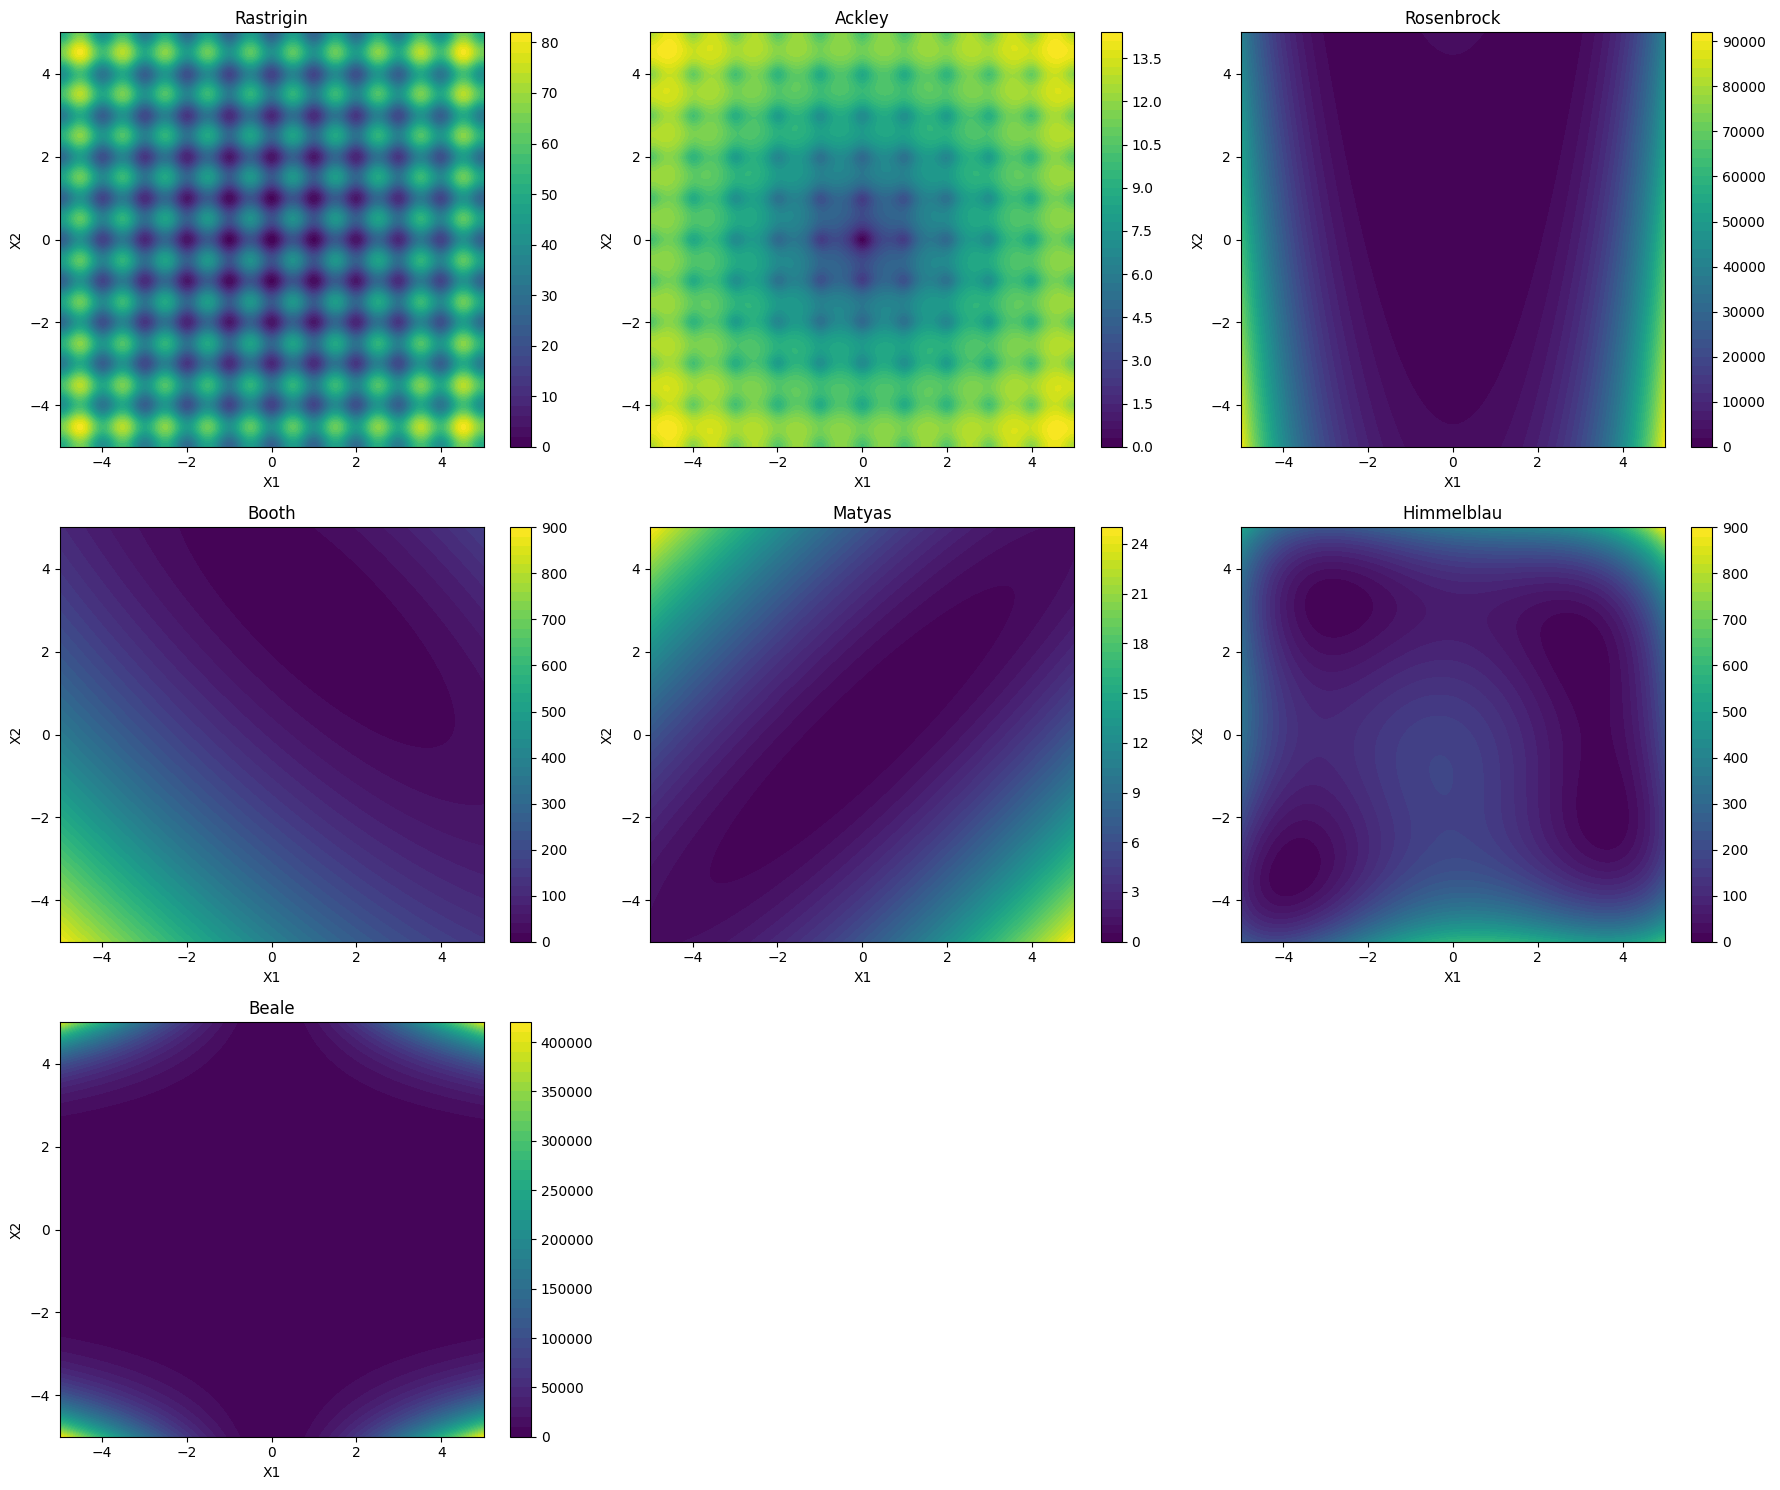

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, sympify, lambdify, pi, E

# Define symbols
X1, X2 = symbols('X1 X2')
symbolic_functions = {
    "rastrigin": "20 + X1**2 - 10*cos(2*pi*X1) + X2**2 - 10*cos(2*pi*X2)",
    "ackley": "-20*exp(-0.2*sqrt(0.5*(X1**2 + X2**2))) - exp(0.5*(cos(2*pi*X1) + cos(2*pi*X2))) + E + 20",
    "rosenbrock": "(1 - X1)**2 + 100*(X2 - X1**2)**2",
    "booth": "(X1 + 2*X2 - 7)**2 + (2*X1 + X2 - 5)**2",
    "matyas": "0.26*(X1**2 + X2**2) - 0.48*X1*X2",
    "himmelblau": "(X1**2 + X2 - 11)**2 + (X1 + X2**2 - 7)**2",
    "beale": "(1.5 - X1 + X1*X2)**2 + (2.25 - X1 + X1*X2**2)**2 + (2.625 - X1 + X1*X2**3)**2"
}

# Create meshgrid
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)

# Evaluate and plot each function
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for i, (name, expr_str) in enumerate(symbolic_functions.items()):
    expr = sympify(expr_str)
    func = lambdify((X1, X2), expr, modules=['numpy', {'E': np.e, 'pi': np.pi}])
    Z = func(X, Y)

    ax = axes[i]
    contour = ax.contourf(X, Y, Z, levels=50, cmap='viridis')
    ax.set_title(name.capitalize())
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    fig.colorbar(contour, ax=ax)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


### ACKLEY FUNCTION

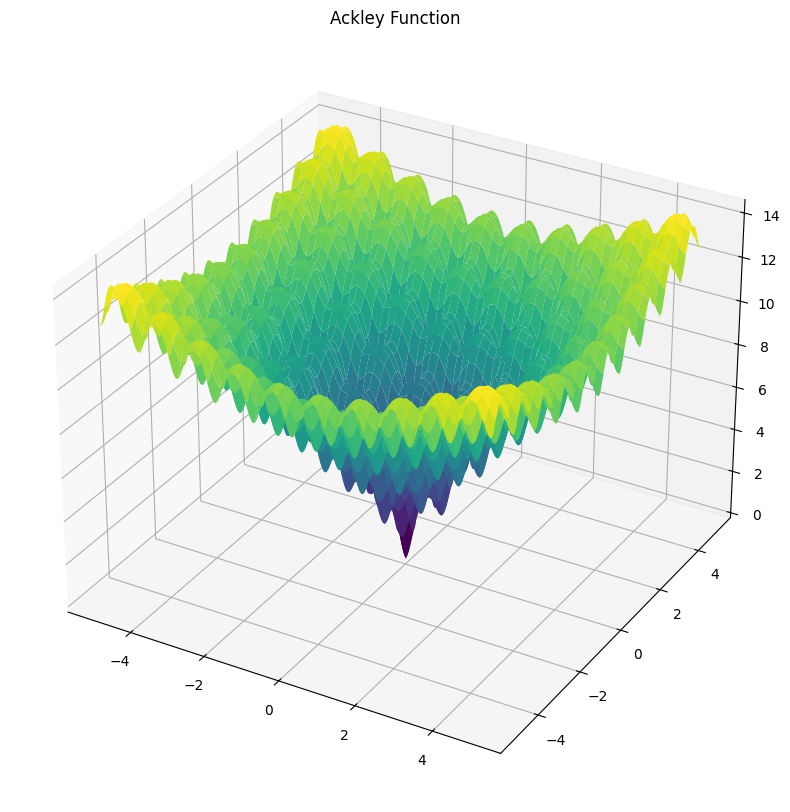

In [ ]:
def ackley(x, y):
    a = 20
    b = 0.2
    c = 2 * np.pi
    sum1 = x**2 + y**2
    sum2 = np.cos(c * x) + np.cos(c * y)
    term1 = -a * np.exp(-b * np.sqrt(0.5 * sum1))
    term2 = -np.exp(0.5 * sum2)
    return term1 + term2 + a + np.e

# Create grid
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)
Z = ackley(X, Y)

# Plot surface
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_title('Ackley Function')
plt.show()


**Visualize the graph of X1, X2 from -50 to +50**

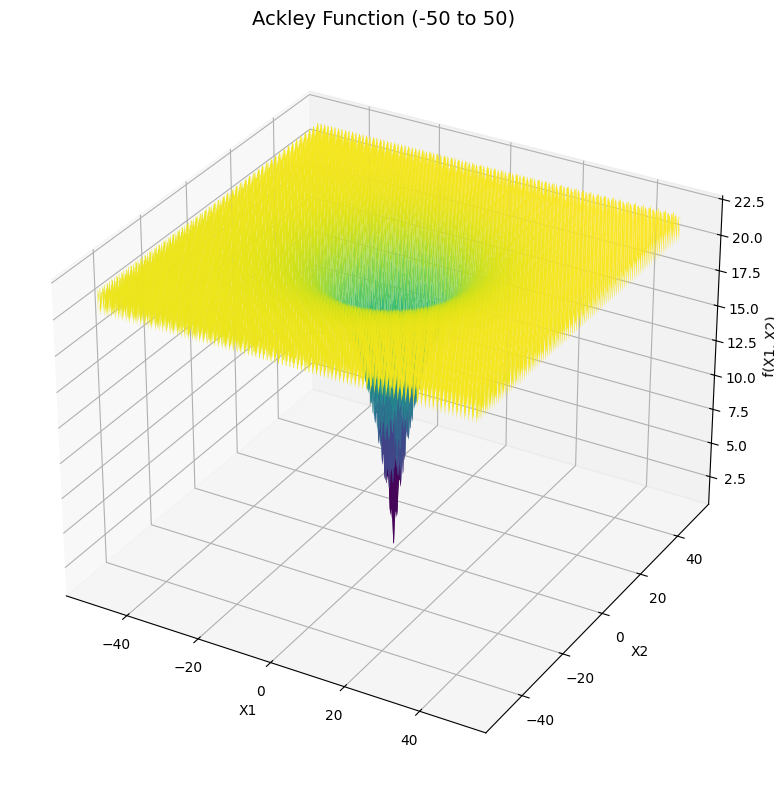

In [ ]:
def ackley(x, y):
    a = 20
    b = 0.2
    c = 2 * np.pi
    sum1 = x**2 + y**2
    sum2 = np.cos(c * x) + np.cos(c * y)
    term1 = -a * np.exp(-b * np.sqrt(0.5 * sum1))
    term2 = -np.exp(0.5 * sum2)
    return term1 + term2 + a + np.e

# Create wider grid
x = np.linspace(-50, 50, 500)
y = np.linspace(-50, 50, 500)
X, Y = np.meshgrid(x, y)
Z = ackley(X, Y)

# Plot surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', rstride=10, cstride=10)
ax.set_title('Ackley Function (-50 to 50)', fontsize=14)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('f(X1, X2)')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Ackley Function Definition
def ackley(x1, x2):
    term1 = -20 * np.exp(-0.2 * np.sqrt(0.5 * (x1**2 + x2**2)))
    term2 = -np.exp(0.5 * (np.cos(2 * np.pi * x1) + np.cos(2 * np.pi * x2)))
    return term1 + term2 + np.e + 20

# Optimization Methods
def brute_force_search(func, bounds, step=1.0):
    x = np.arange(bounds[0][0], bounds[0][1], step)
    y = np.arange(bounds[1][0], bounds[1][1], step)
    X, Y = np.meshgrid(x, y)
    Z = func(X, Y)
    min_idx = np.argmin(Z)
    point = (X.flatten()[min_idx], Y.flatten()[min_idx])
    return point, func(*point)

def numerical_gradient(func, h=1e-5):
    def grad(x, y):
        dx = (func(x + h, y) - func(x - h, y)) / (2 * h)
        dy = (func(x, y + h) - func(x, y - h)) / (2 * h)
        return np.array([dx, dy])
    return grad

def gradient_descent(func, grad_func, start, lr=0.01, max_iter=1000, tol=1e-6):
    point = np.array(start)
    for _ in range(max_iter):
        grad = grad_func(*point)
        new_point = point - lr * grad
        if np.linalg.norm(new_point - point) < tol:
            break
        point = new_point
    return tuple(point), func(*point)

def simulated_annealing(func, bounds, start=None, temp=1000, cooling=0.99, max_iter=1000):
    if start is None:
        start = (np.random.uniform(*bounds[0]), np.random.uniform(*bounds[1]))
    point = np.array(start)
    current_val = func(*point)

    for _ in range(max_iter):
        temp *= cooling
        new_point = point + np.random.normal(0, 1, size=2)
        new_point = np.clip(new_point, [bounds[0][0], bounds[1][0]], [bounds[0][1], bounds[1][1]])
        new_val = func(*new_point)

        if new_val < current_val or np.random.rand() < np.exp(-(new_val - current_val)/temp):
            point, current_val = new_point, new_val

    return tuple(point), current_val

def genetic_algorithm(func, bounds, pop_size=50, generations=100):
    def create_individual():
        return [np.random.uniform(bounds[0][0], bounds[0][1]),
                np.random.uniform(bounds[1][0], bounds[1][1])]

    population = [create_individual() for _ in range(pop_size)]
    for _ in range(generations):
        fitness = np.array([func(*ind) for ind in population])
        parents = [population[i] for i in np.random.choice(pop_size, size=pop_size, p=1/(fitness+1e-10)/(1/(fitness+1e-10)).sum())]

        children = []
        for i in range(0, pop_size, 2):
            p1, p2 = parents[i], parents[i+1]
            child1 = [p1[0] if np.random.rand() < 0.5 else p2[0],
                     p1[1] if np.random.rand() < 0.5 else p2[1]]
            child2 = [p2[0] if np.random.rand() < 0.5 else p1[0],
                     p2[1] if np.random.rand() < 0.5 else p1[1]]
            children.extend([child1, child2])

        for child in children:
            if np.random.rand() < 0.1:
                child[0] += np.random.normal(0, 0.5)
                child[1] += np.random.normal(0, 0.5)
                child[0] = np.clip(child[0], bounds[0][0], bounds[0][1])
                child[1] = np.clip(child[1], bounds[1][0], bounds[1][1])

        population = children

    best_idx = np.argmin([func(*ind) for ind in population])
    return tuple(population[best_idx]), func(*population[best_idx])

def hooke_jeeves(func, start, step=1.0, reduction=0.5, tol=1e-6):
    point = np.array(start)
    while step > tol:
        improved = False
        for dim in [0, 1]:
            for direction in [-1, 1]:
                trial_point = point.copy()
                trial_point[dim] += step * direction
                if func(*trial_point) < func(*point):
                    point = trial_point
                    improved = True
                    break
            if improved:
                break
        if not improved:
            step *= reduction
    return tuple(point), func(*point)



**Visualize the graph with points of optimums from different methods.**

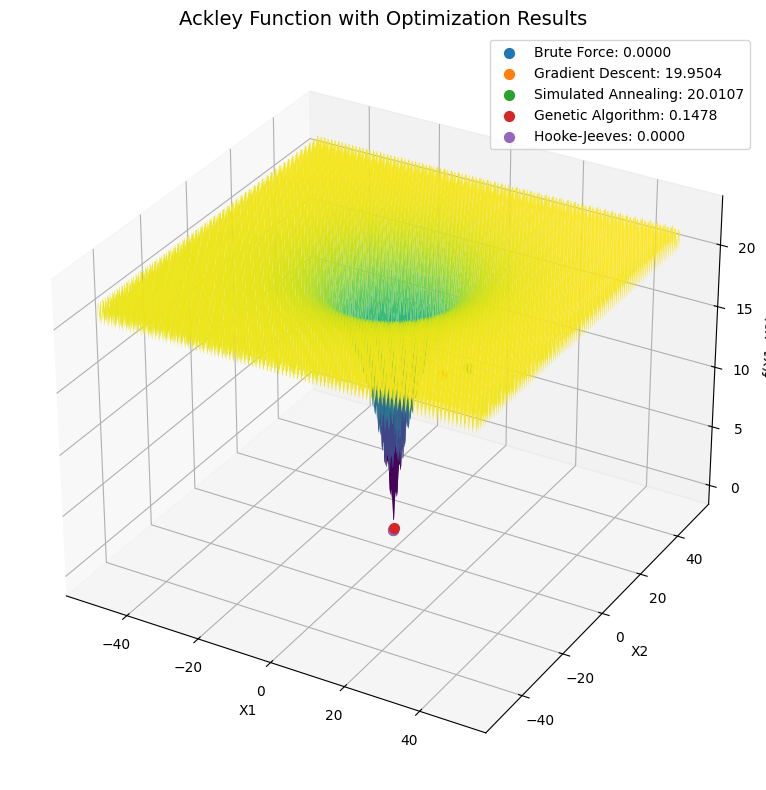

In [ ]:
# Create grid for visualization
x = np.linspace(-50, 50, 500)
y = np.linspace(-50, 50, 500)
X, Y = np.meshgrid(x, y)
Z = ackley(X, Y)

# Bounds for optimization
bounds = [(-50, 50), (-50, 50)]
results = {}

# Brute Force Search
results['Brute Force'] = brute_force_search(ackley, bounds, step=1.0)

# Gradient Descent
grad = numerical_gradient(ackley)
results['Gradient Descent'] = gradient_descent(ackley, grad, start=(30, -30))

# Simulated Annealing
results['Simulated Annealing'] = simulated_annealing(ackley, bounds)

# Genetic Algorithm
results['Genetic Algorithm'] = genetic_algorithm(ackley, bounds)

# Pattern Search (Hooke-Jeeves)
results['Hooke-Jeeves'] = hooke_jeeves(ackley, start=(45, 45))

# Visualize the Ackley function with optimization points
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', rstride=10, cstride=10)

# Plot points of optimums from different methods
for method, (point, value) in results.items():
    ax.scatter(point[0], point[1], value, label=f"{method}: {value:.4f}", s=50)

# Set labels and title
ax.set_title('Ackley Function with Optimization Results', fontsize=14)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('f(X1, X2)')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

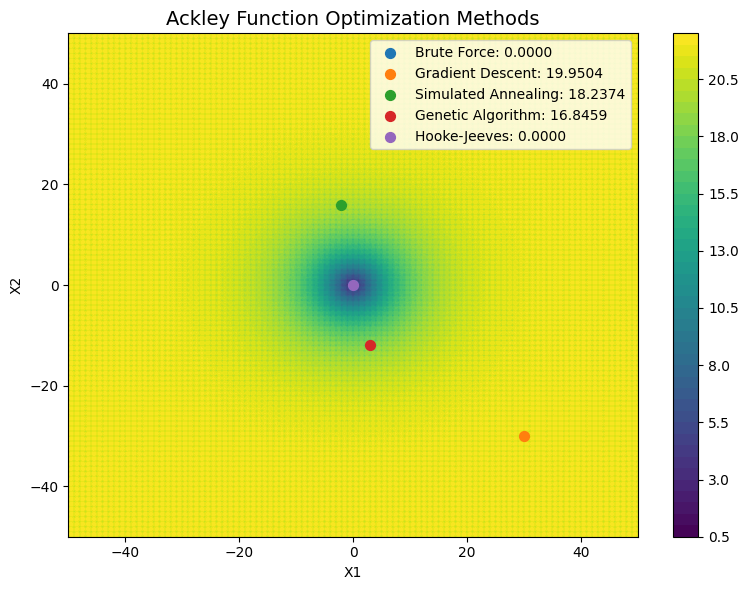

In [ ]:
plt.figure(figsize=(8, 6))
cp = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(cp)
plt.title('Ackley Function Optimization Methods', fontsize=14)
plt.xlabel('X1')
plt.ylabel('X2')

# Plot points of optimums from different methods
for method, (point, value) in results.items():
    plt.scatter(point[0], point[1], label=f"{method}: {value:.4f}", s=50)

plt.legend()
plt.tight_layout()
plt.show()

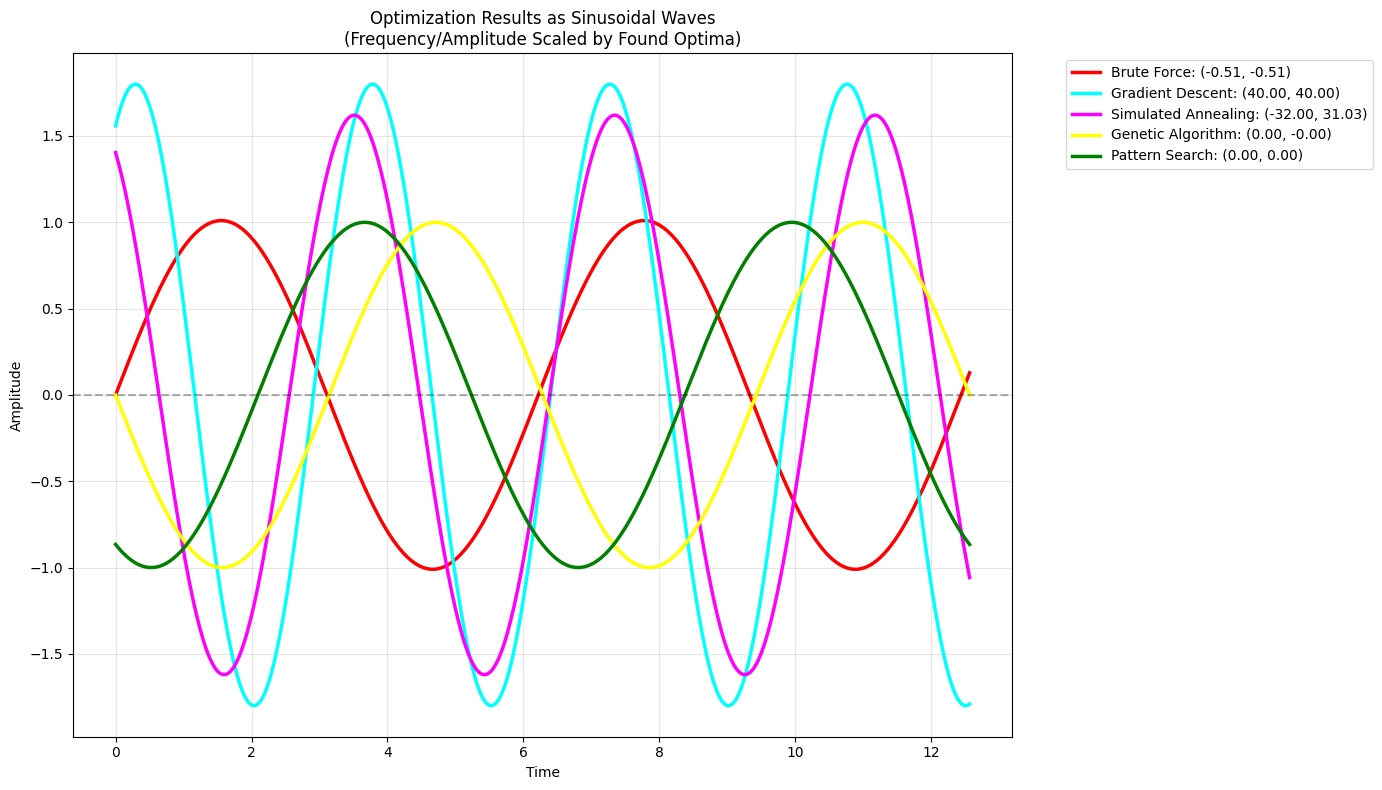

In [ ]:
# Ackley Function Definition
def ackley(x1, x2):
    term1 = -20 * np.exp(-0.2 * np.sqrt(0.5 * (x1**2 + x2**2)))
    term2 = -np.exp(0.5 * (np.cos(2 * np.pi * x1) + np.cos(2 * np.pi * x2)))
    return term1 + term2 + np.e + 20


def plot_sinusoidal_results():
    # Run all optimizations
    optima = [
        ('Brute Force', brute_force(ackley)),
        ('Gradient Descent', gradient_descent(ackley, (40,40))),
        ('Simulated Annealing', simulated_annealing(ackley, (-30,30))),
        ('Genetic Algorithm', genetic_algorithm(ackley)),
        ('Pattern Search', pattern_search(ackley, (25,-25)))
    ]

    # Create time axis for sinusoidal wave
    t = np.linspace(0, 4*np.pi, 500)

    # Create figure
    plt.figure(figsize=(14, 8))

    # Plot each optimization result as a sinusoidal wave
    colors = ['red', 'cyan', 'magenta', 'yellow', 'green']
    for i, (name, (x_opt, y_opt)) in enumerate(optima):
        # Create sinusoidal wave with frequency/amplitude based on optimization result
        freq = 1 + abs(x_opt)/50
        amp = 1 + abs(y_opt)/50
        wave = amp * np.sin(freq * t + i*np.pi/3)

        plt.plot(t, wave, color=colors[i], linewidth=2.5,
                label=f'{name}: ({x_opt:.2f}, {y_opt:.2f})')

    # Add horizontal line at y=0 for reference
    plt.axhline(0, color='black', linestyle='--', alpha=0.3)

    # Formatting
    plt.title('Optimization Results as Sinusoidal Waves\n(Frequency/Amplitude Scaled by Found Optima)')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Combined visualization
def plot_combined_results():
    # Create grid from -50 to +50
    x = np.linspace(-50, 50, 200)
    y = np.linspace(-50, 50, 200)
    X, Y = np.meshgrid(x, y)
    Z = ackley(X, Y)

    # Run all optimizations
    optima = [
        ('Brute Force', brute_force(ackley), 'red'),
        ('Gradient Descent', gradient_descent(ackley, (40,40)), 'cyan'),
        ('Simulated Annealing', simulated_annealing(ackley, (-30,30)), 'magenta'),
        ('Genetic Algorithm', genetic_algorithm(ackley), 'yellow'),
        ('Pattern Search', pattern_search(ackley, (25,-25)), 'white')
    ]

    # Create figure with 3 subplots
    fig = plt.figure(figsize=(20, 6))

    # 1. 3D Surface Plot
    ax1 = fig.add_subplot(131, projection='3d')
    surf = ax1.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', rstride=2, cstride=2)
    ax1.set_title('Ackley Function 3D Surface')
    fig.colorbar(surf, ax=ax1, shrink=0.6)

    # 2. Contour Plot with Optima
    ax2 = fig.add_subplot(132)
    contour = ax2.contourf(X, Y, Z, levels=20, cmap='viridis')
    for name, (x_opt, y_opt), color in optima:
        ax2.scatter(x_opt, y_opt, c=color, s=100, edgecolor='black', label=f'{name}')
    ax2.set_title('Contour Plot with Optima Points')
    fig.colorbar(contour, ax=ax2, shrink=0.6)
    ax2.legend()

    # 3. Sinusoidal Representation
    ax3 = fig.add_subplot(133)
    t = np.linspace(0, 4*np.pi, 500)
    colors = ['red', 'cyan', 'magenta', 'yellow', 'green']
    for i, (name, (x_opt, y_opt), _) in enumerate(optima):
        freq = 1 + abs(x_opt)/50
        amp = 1 + abs(y_opt)/50
        wave = amp * np.sin(freq * t + i*np.pi/3)
        ax3.plot(t, wave, color=colors[i], linewidth=2, label=f'{name}')
    ax3.set_title('Sinusoidal Representation of Results')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

plot_sinusoidal_results()